<p style="background-color: darkviolet; font-family: newtimeroman; font-size: 300%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b>Flowers CNN Projects</b>

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn
    
import cv2      
from tqdm import tqdm                  
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [2]:
pwd

'C:\\Users\\defne\\Desktop\\Project\\DL_Flowers_Project'

In [3]:
my_data= 'flowers'

In [4]:
os.listdir(my_data) 

['daisy', 'dandelion', 'rose', 'sunflower', 'test', 'train', 'tulip']

In [5]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'


In [6]:
data_folder = r'C:\Users\defne\Desktop\Project\DL_Flowers_Project\flowers'

#Train ve test klasörlerini oluşturalim:
import os
import shutil

# Train ve test klasörlerini oluşturun
train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

#Her sınıf için train ve test klasörlerini oluşturalim:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

for flower_class in classes:
    # Sınıfa ait train ve test klasörlerini oluşturun
    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)

    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

# Verileri train ve test klasörlerine kopyalayın. Örneğin, her sınıfın %80'i train, %20'si test olarak ayırmak isterseniz:
import random

split_ratio = 0.8  # Train için %80, Test için %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)  # Verileri rastgele sıralayın

    split_index = int(len(flower_images) * split_ratio)

    # Train klasörüne kopyala
    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    # Test klasörüne kopyala
    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)

In [7]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


## Visualizations

IndexError: list index out of range

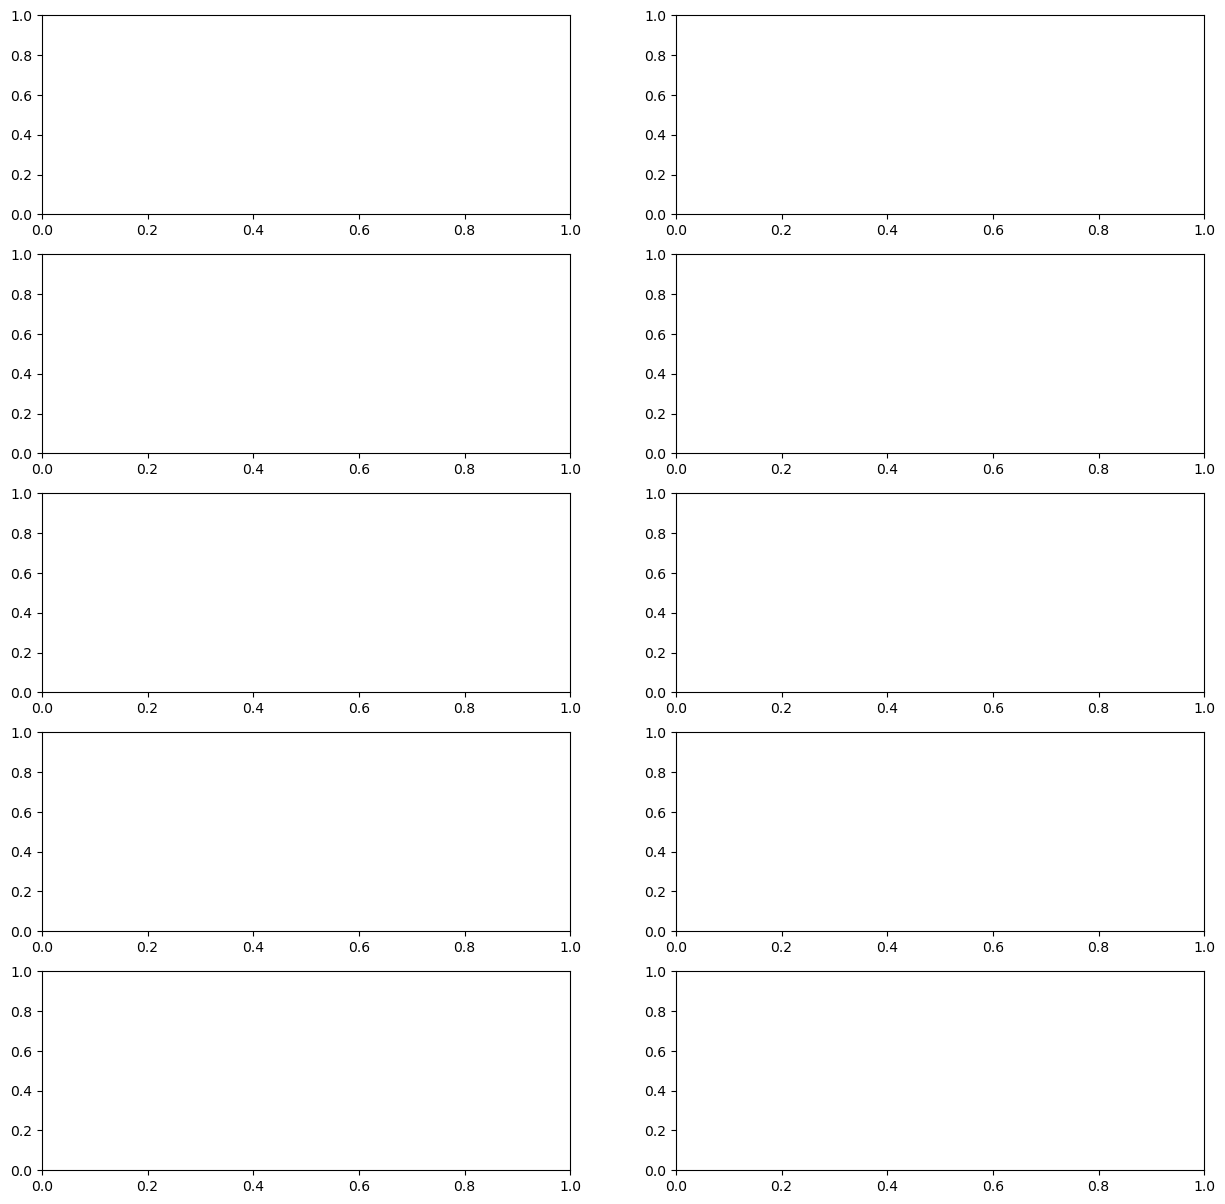

In [8]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

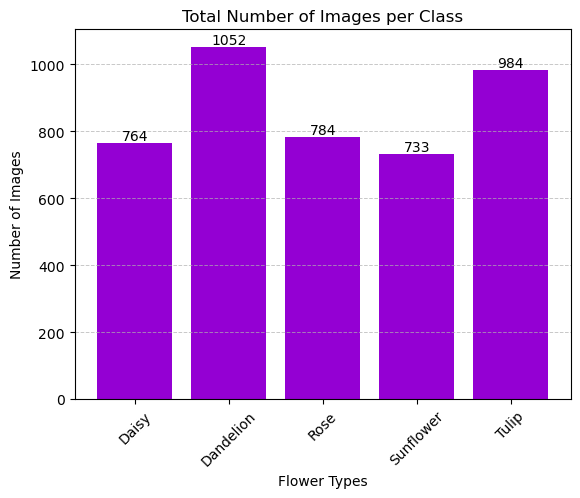

In [17]:
import os
import matplotlib.pyplot as plt

# Çiçek türlerini tanımlayın
classes = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

# Resimlerin bulunduğu dizini tanımlayın
data_dir = r'C:\Users\defne\Desktop\Project\DL_Flowers_Project\flowers'

# Her sınıf için toplam resim sayısını hesaplayın
total_counts = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)

# Toplam resim sayılarını bir çubuk grafik ile gösterin
plt.bar(classes, total_counts, color='darkviolet')
plt.xlabel('Flower Types')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.7)

# Çubukların üzerine değerleri yazdırın
for i, count in enumerate(total_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

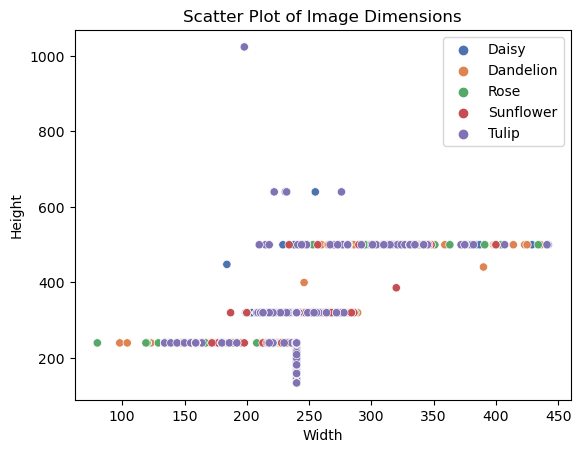

In [18]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):  # Sadece .jpg dosyalarını işle
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)
            hue.append(class_name)

sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [19]:
print(np.mean(x), np.mean(y))

252.1164542294322 337.12920046349944


In [20]:
path1=train_path+'/daisy'+"/1342002397_9503c97b49.jpg"

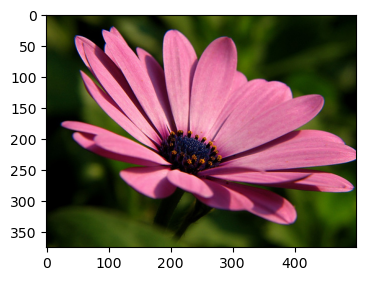

In [21]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [22]:
flower_img.max()

255

In [23]:
flower_img.min()

0

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )


In [25]:
flower_img.shape

(375, 500, 3)

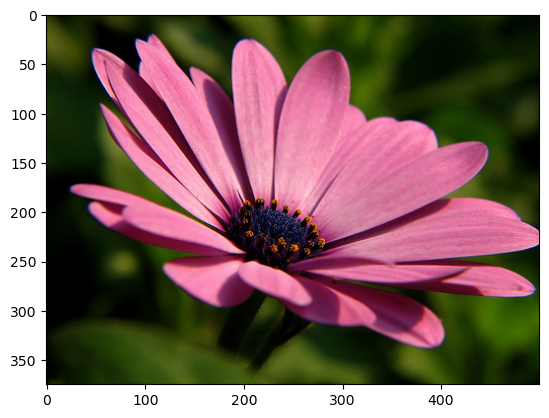

In [26]:
plt.imshow(flower_img)

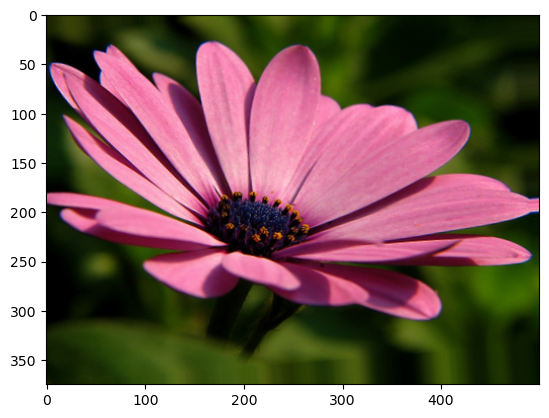

In [27]:
plt.imshow(flower_gen.random_transform(flower_img))

In [28]:
flower_gen.flow_from_directory(train_path)

Found 3452 images belonging to 5 classes.


In [29]:
flower_gen.flow_from_directory(test_path)

Found 865 images belonging to 5 classes.


# Creating the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [31]:
from tensorflow.keras.layers import BatchNormalization

In [32]:
image_shape = (224,224,3)